# Multi-Well Data Integration Analysis

This notebook/script performs a combined multi-well analysis to identify and visualize the relationships between well log data and laboratory geochemical measurements across multiple wells.



# 1. Environment Setup and Library Imports

This section imports all required libraries and configures the analysis environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
import missingno as msno
import os
from All_well_analysis import *


# Configure matplotlib for proper saving and display
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')  
plt.ion()  #

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create output directory for plots
Path('imgs').mkdir(exist_ok=True)



# 2. Multi-Well Data Loading and Integration

This section loads data from all available wells, handles duplicate columns (particularly in HRDH_1867), and combines them into a unified dataset for cross-well analysis.

In [2]:
'''
Understanding Correlation Thresholds and Classifications
Let me explain how the correlation threshold affects your analysis and what the "valid correlations" metric means:

Valid Correlations (561/1645)
The 561/1645 valid correlations statistic is not directly affected by changing the corr_threshold parameter. Here's what this number represents:

561 = Number of log-lab variable pairs where a correlation could be successfully calculated
1645 = Total possible log-lab variable pairs that could theoretically be correlated
Validity criteria:
At least min_samples=10 data points exist for both variables
Both variables have non-zero variance (not constant values)
No calculation errors occurred
This ratio (561/1645 = 34.1%) represents your data coverage - the portion of possible relationships that have enough data to calculate correlations.

How corr_threshold=0.3 Works
The corr_threshold parameter determines which correlations are considered strong enough to be included in the results and visualizations, not how many are calculated:

When set to 0.3, only correlations with |r| ≥ 0.3 are kept for further analysis
Changing it to 0.2 would include more (weaker) correlations in your results
Changing it to 0.5 would include fewer (only stronger) correlations
'''
# Basic usage with default parameters
# df_all, well_correlations, well_stats, common_correlations = analyze_wells()

# strong_corr > 0.5
# moderate_corr 0.5 <= r < 0.7
# Customize parameters
min_corr = 0.3
df_all, well_correlations, well_stats, common_correlations = analyze_wells(
    base_path=".",
    corr_threshold=min_corr,    # Lower threshold to find more correlations
    min_samples=8,              # Minimum samples per correlation
    min_wells=2                 # Require correlations to appear in at least 2 wells
)

# Export common correlations to CSV
common_correlations.to_csv("common_correlations.csv", index=False)

# df_all


Found 4 joined CSV files:
  HRDH_1119\HRDH_1119_joined.csv
  HRDH_1804\HRDH_1804_joined.csv
  HRDH_1867\HRDH_1867_joined.csv
  HRDH_697\HRDH_697_joined.csv
Loaded HRDH_1119: 18 samples, 73 columns
Loaded HRDH_1804: 41 samples, 56 columns
Loaded HRDH_1867: 9 samples, 59 columns
Loaded HRDH_697: 10 samples, 66 columns

Combined dataset: 78 total samples from 4 wells
Wells: HRDH_1119, HRDH_1804, HRDH_1867, HRDH_697
Total columns: 89
Found 35 lab variables and 47 log variables

Processing HRDH_1119...
  HRDH_1119: 561/1645 valid correlations (34.1% coverage)
  Mean |r|: 0.367, Strong: 42, Moderate: 131
Processing HRDH_1804...
  HRDH_1804: 145/1645 valid correlations (8.8% coverage)
  Mean |r|: 0.257, Strong: 0, Moderate: 11
Processing HRDH_1867...
  HRDH_1867: 279/1645 valid correlations (17.0% coverage)
  Mean |r|: 0.357, Strong: 33, Moderate: 53
Processing HRDH_697...
  HRDH_697: 425/1645 valid correlations (25.8% coverage)
  Mean |r|: 0.356, Strong: 33, Moderate: 89

CORRELATION ANALYSI

# 4. Data Quality Assessment and Missing Value Analysis

This section evaluates data completeness across wells, identifies patterns in missing data, and visualizes data availability to understand limitations for correlation analysis.

Creating comprehensive missing data visualizations by well...


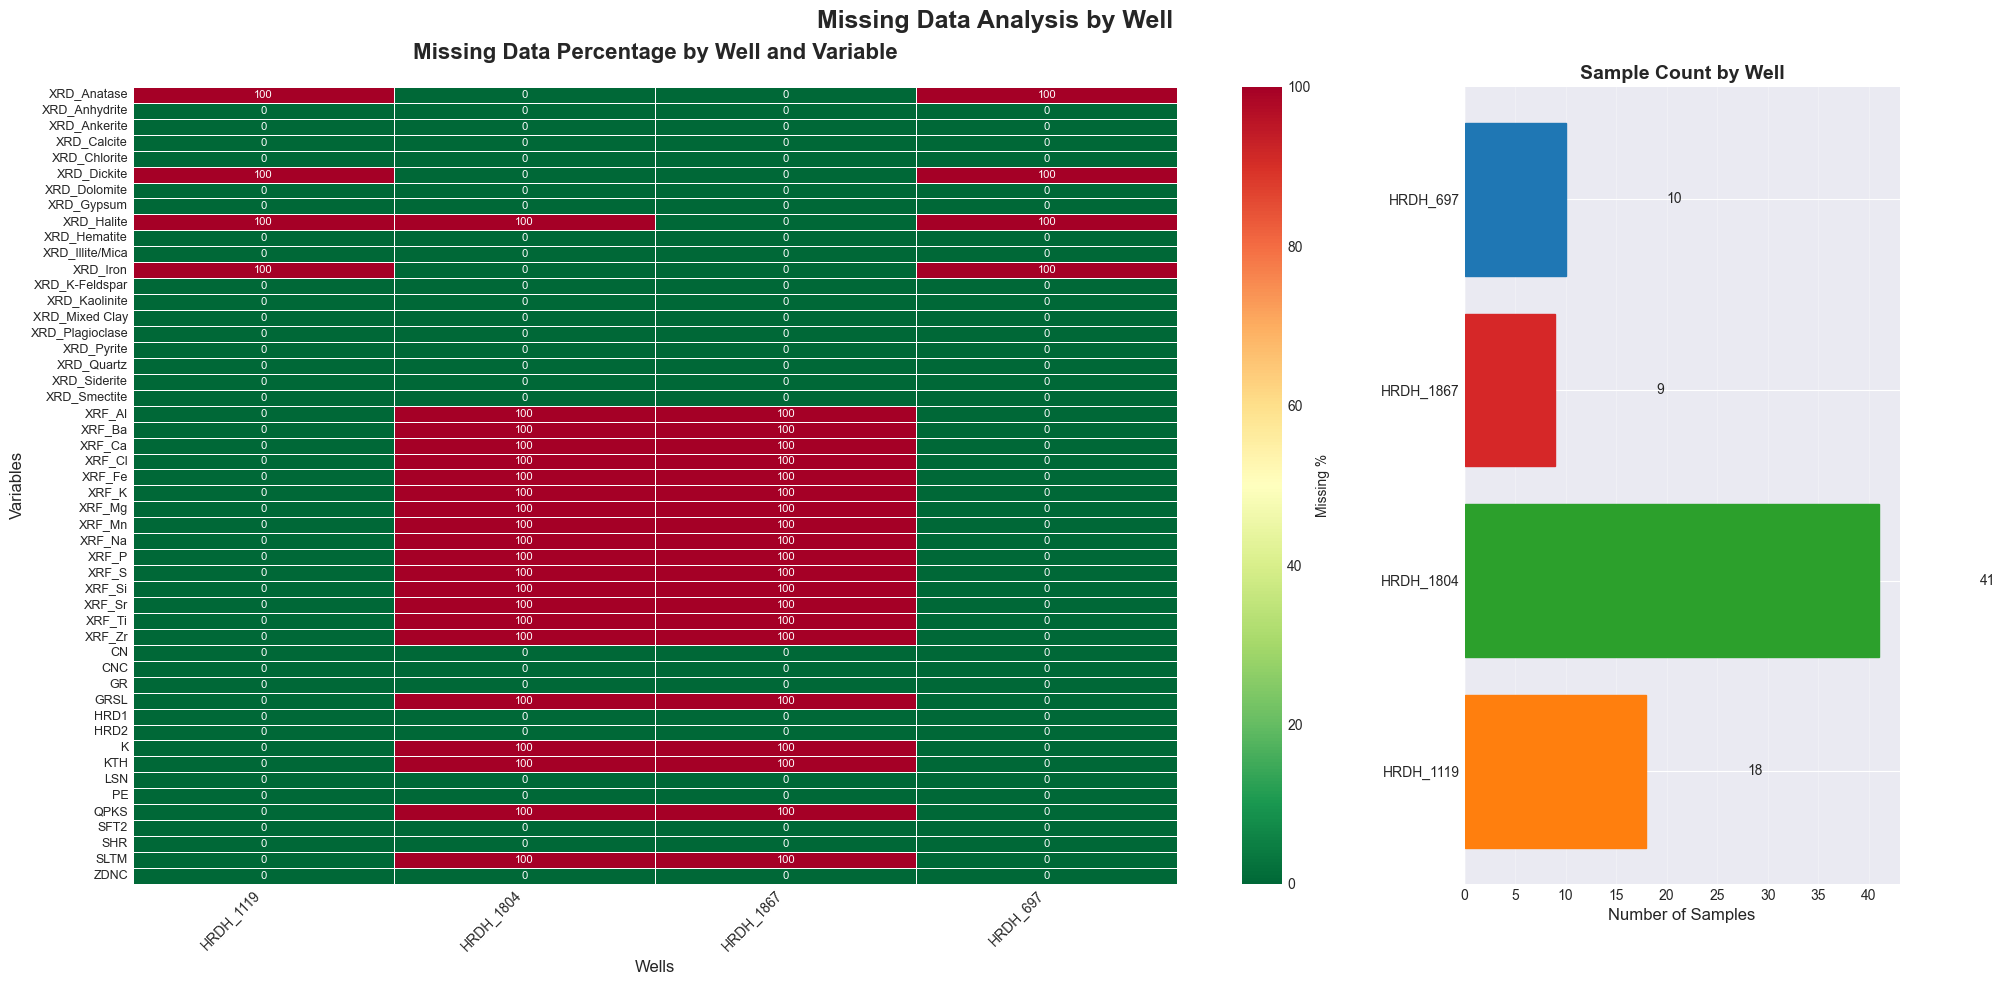


MISSING DATA ANALYSIS SUMMARY

Overall Missing Data by Well:
------------------------------------------------------------
HRDH_1119:
  Total samples: 18
  Overall missing: 8.0%
  Lab data missing: 11.4%
  Log data missing: 0.0%
HRDH_1804:
  Total samples: 41
  Overall missing: 42.0%
  Lab data missing: 45.7%
  Log data missing: 33.3%
HRDH_1867:
  Total samples: 9
  Overall missing: 40.0%
  Lab data missing: 42.9%
  Log data missing: 33.3%
HRDH_697:
  Total samples: 10
  Overall missing: 8.0%
  Lab data missing: 11.4%
  Log data missing: 0.0%

Variables with Highest Completeness (>90%):
------------------------------------------------------------
  - ZDNC: 100.0% average completeness
  - XRD_Mixed Clay: 100.0% average completeness
  - CN: 100.0% average completeness
  - CNC: 100.0% average completeness
  - GR: 100.0% average completeness
  - HRD1: 100.0% average completeness
  - HRD2: 100.0% average completeness
  - XRD_Anhydrite: 100.0% average completeness
  - LSN: 100.0% average com

In [3]:

# Call the enhanced visualization function
print("Creating comprehensive missing data visualizations by well...")

# Define lab_columns and log_columns before using them
lab_columns = [col for col in df_all.columns if col.startswith('Lab_') and 
              col not in ['Lab_Depth', 'Lab_Sample_ID']]
log_columns = [col for col in df_all.columns if col.startswith('Log_') and 
              col not in ['Log_Depth', 'Log_FRAMENO']]

# Restrict specific_logs to only those present in log_columns (with 'Log_' prefix)
specific_logs = ['CN', 'CNC', 'GR', 'GRSL', 'HRD1', 'HRD2', 'K', 'KTH', 'LSN', 
                'PE', 'QPKS', 'SFT2', 'SHR', 'SLTM', 'ZDNC']
specific_logs_in_data = [log for log in specific_logs if f'Log_{log}' in log_columns]
specific_log_columns  = [f'Log_{log}' for log in specific_logs_in_data]
# Now call the function with the defined variables (all logs)
# visualize_missing_data_by_well(df_all, lab_columns, log_columns)
# specific_log_columns
visualize_missing_data_by_well(df_all, lab_columns, specific_log_columns)


# Visualize Common Correlations - Combined Scatter Plots


## Heatmap


Creating combined(correlation) correlation heatmaps...
Using 15 specific log columns
Using 35 lab columns


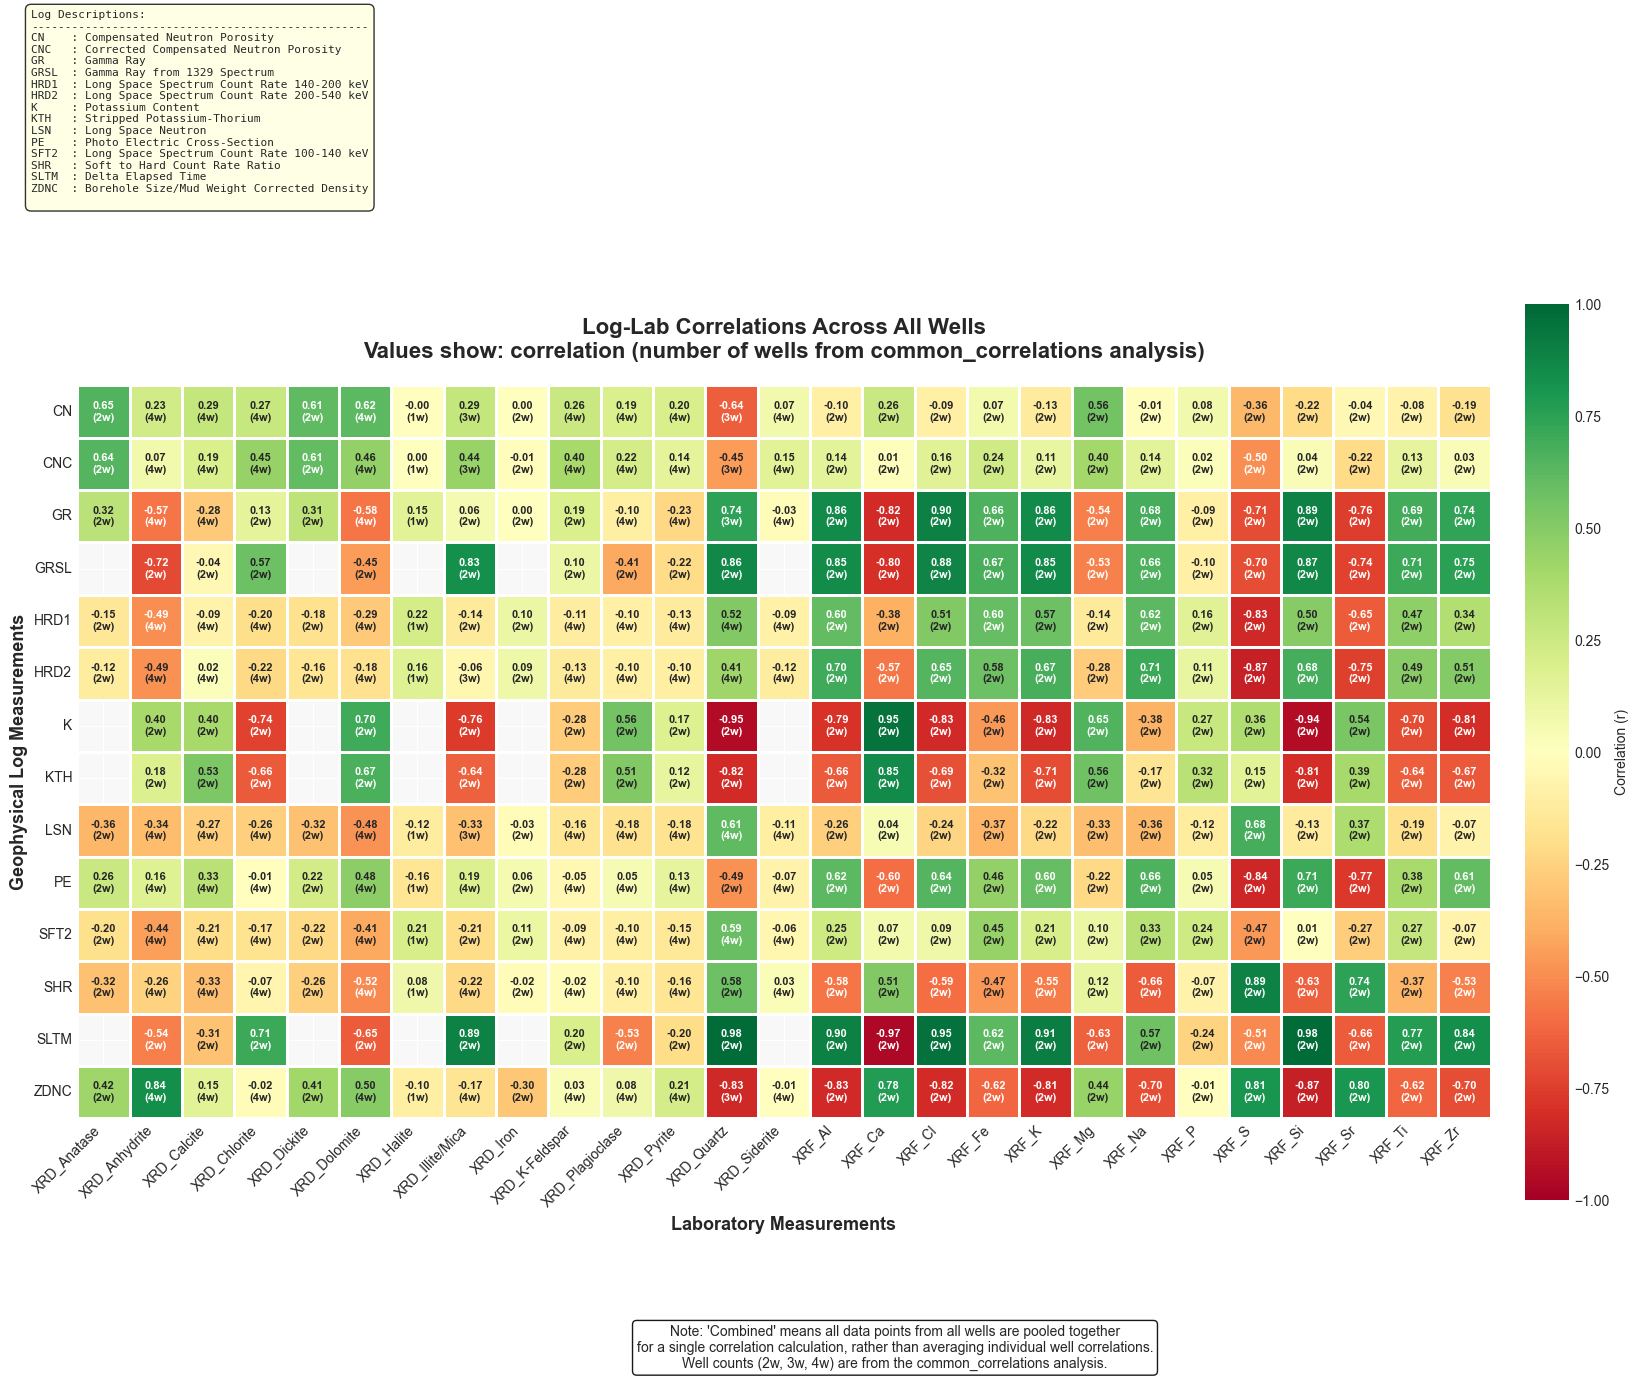

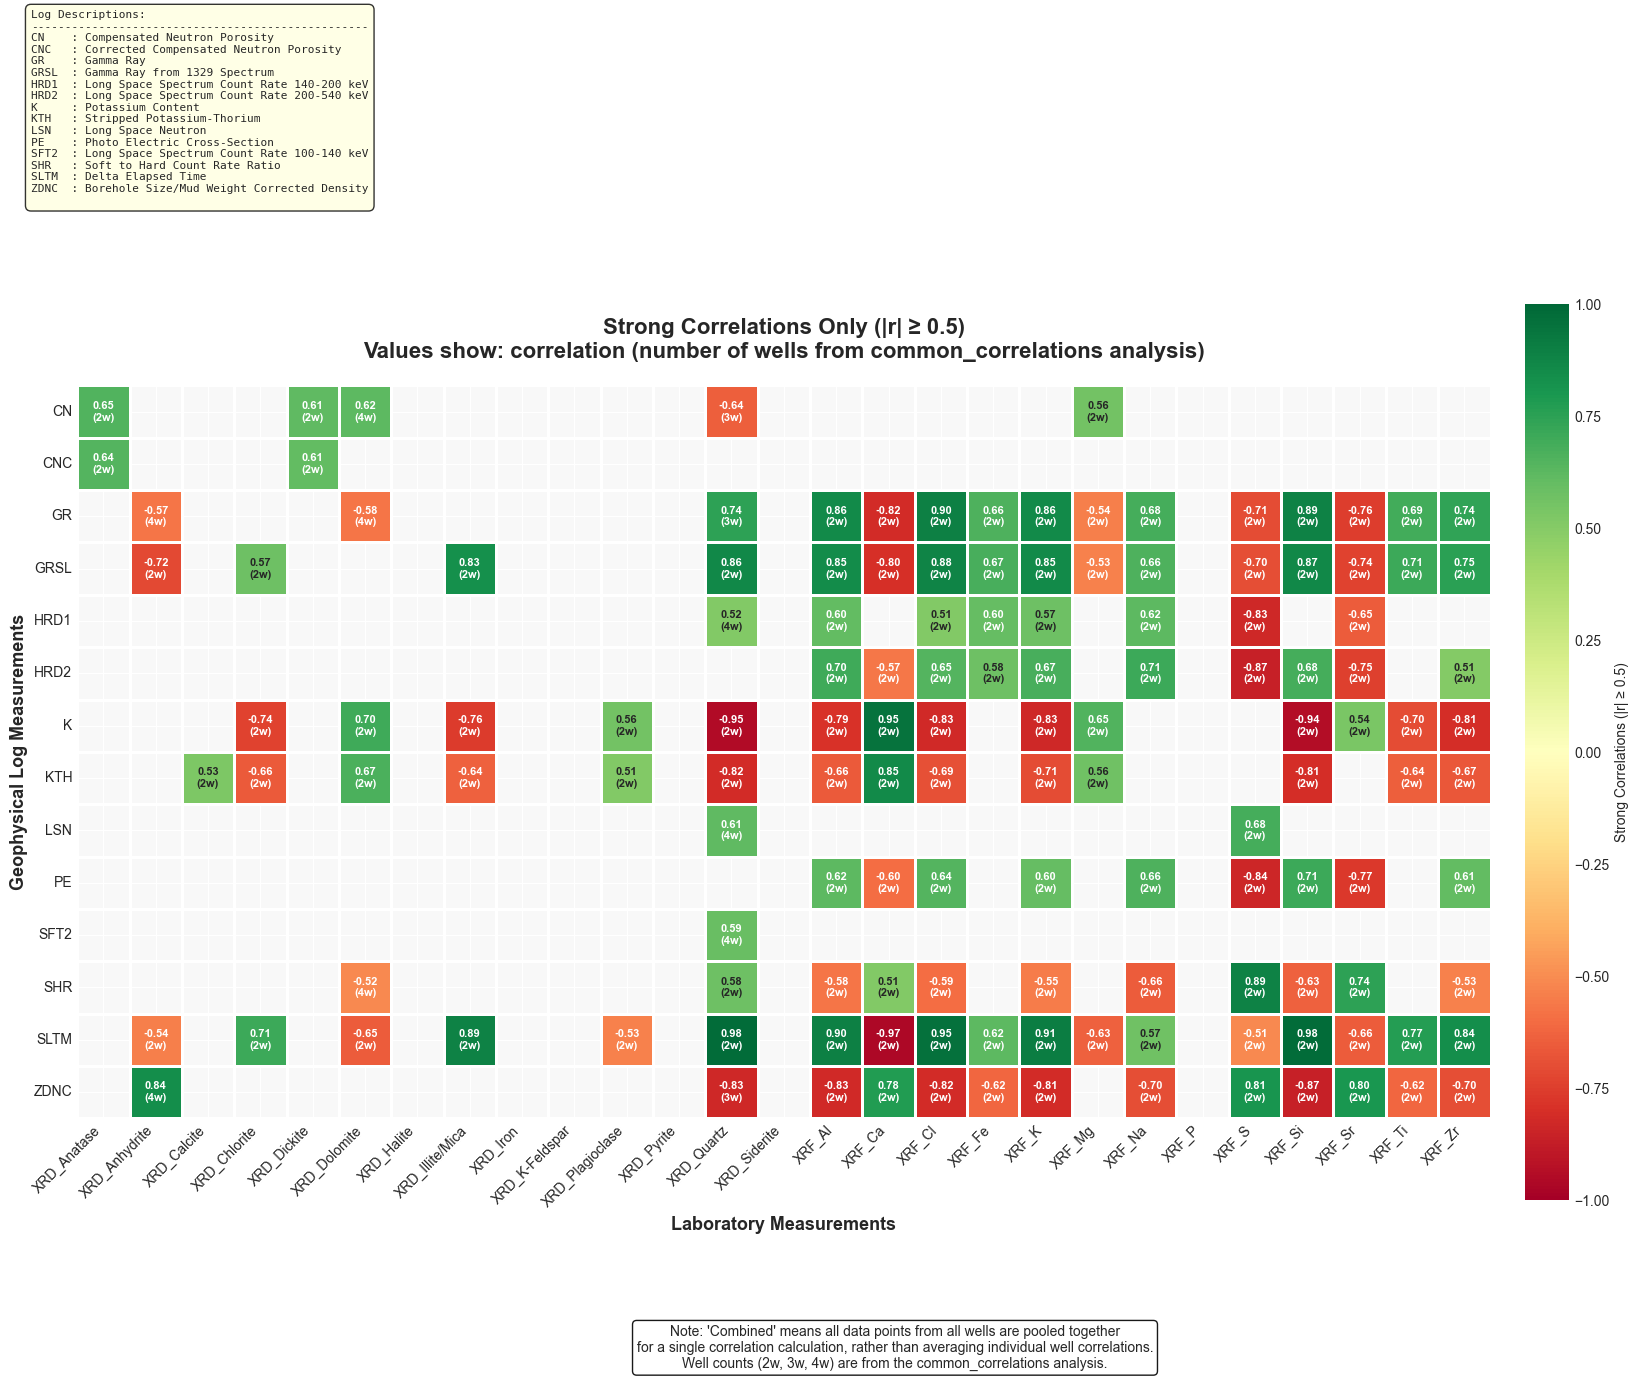


COMBINED CORRELATION ANALYSIS SUMMARY

CORRELATION STRENGTH DISTRIBUTION:
------------------------------------------------------------
Very Strong (|r| ≥ 0.7): 64 (17.9%)
Strong (|r| ≥ 0.5): 138 (38.5%)
Moderate (|r| ≥ 0.3): 194 (54.2%)

SAMPLE SIZE DISTRIBUTION:
------------------------------------------------------------
Range: nan - nan samples
Mean: nan samples
Median: nan samples

HIGHEST CONFIDENCE CORRELATION:
------------------------------------------------------------
ZDNC vs XRD_Anhydrite
r = 0.840, n = 78.0
Wells with sufficient data (≥8 samples): 4 wells


In [4]:

#  heatmap 
'''
Heatmap Values (Standardized)
The heatmap displays correlation coefficients (r values)
These range from -1 to 1, representing standardized relationship strength
The color gradient represents the strength and direction of correlation
What's shown in each cell is the calculated Pearson correlation coefficient
These are standardized statistical measures, not actual data points

the heatmap function The heatmap displays ALL valid correlations that can be calculated.
corr_threshold parameter in analyze_wells() does NOT affect the number of correlations shown in the heatmap
'''
print("\nCreating combined(correlation) correlation heatmaps...")

specific_logs = ['CN', 'CNC', 'GR', 'GRSL', 'HRD1', 'HRD2', 'K', 'KTH', 'LSN', 
                'PE', 'QPKS', 'SFT2', 'SHR', 'SLTM', 'ZDNC']

# Convert specific logs to proper column names and filter to only those that exist in df_all
specific_log_columns = [f'Log_{log}' for log in specific_logs if f'Log_{log}' in df_all.columns]

print(f"Using {len(specific_log_columns)} specific log columns")
print(f"Using {len(lab_columns)} lab columns")

# Call with specific log columns instead of all log columns
combined_corr_matrix, sample_size_matrix = create_combined_correlation_heatmap(
    df_all, lab_columns, specific_log_columns, well_correlations,
    common_correlations=common_correlations  # NEW: Pass common_correlations
)

## Scatterplot


2-well correlations: 77 pairs
Top 5 correlations:
  1. CN vs XRD_Dickite: wells 1804, 1867, avg_r=0.726
  2. CNC vs XRD_Dickite: wells 1804, 1867, avg_r=0.719
  3. SHR vs XRF_Sr: wells 1119, 697, avg_r=0.691
  4. PE vs XRF_Sr: wells 1119, 697, avg_r=-0.689
  5. LSN vs XRF_Cl: wells 1119, 697, avg_r=-0.663

3-well correlations: 8 pairs
Top 5 correlations:
  1. CN vs XRD_Quartz: wells 1804, 1867, 697, avg_r=-0.698
  2. CNC vs XRD_Quartz: wells 1804, 1867, 697, avg_r=-0.697
  3. ZDNC vs XRD_Quartz: wells 1119, 1804, 1867, avg_r=-0.293
  4. GR vs XRD_Quartz: wells 1119, 1867, 697, avg_r=-0.327
  5. LSN vs XRD_Illite/Mica: wells 1804, 1867, 697, avg_r=-0.527

4-well correlations: 4 pairs
Top 4 correlations:
  1. LSN vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=0.409
  2. HRD1 vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=0.060
  3. SFT2 vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=0.093
  4. HRD2 vs XRD_Quartz: wells 1119, 1804, 1867, 697, avg_r=0.089

Creating scatter plots 

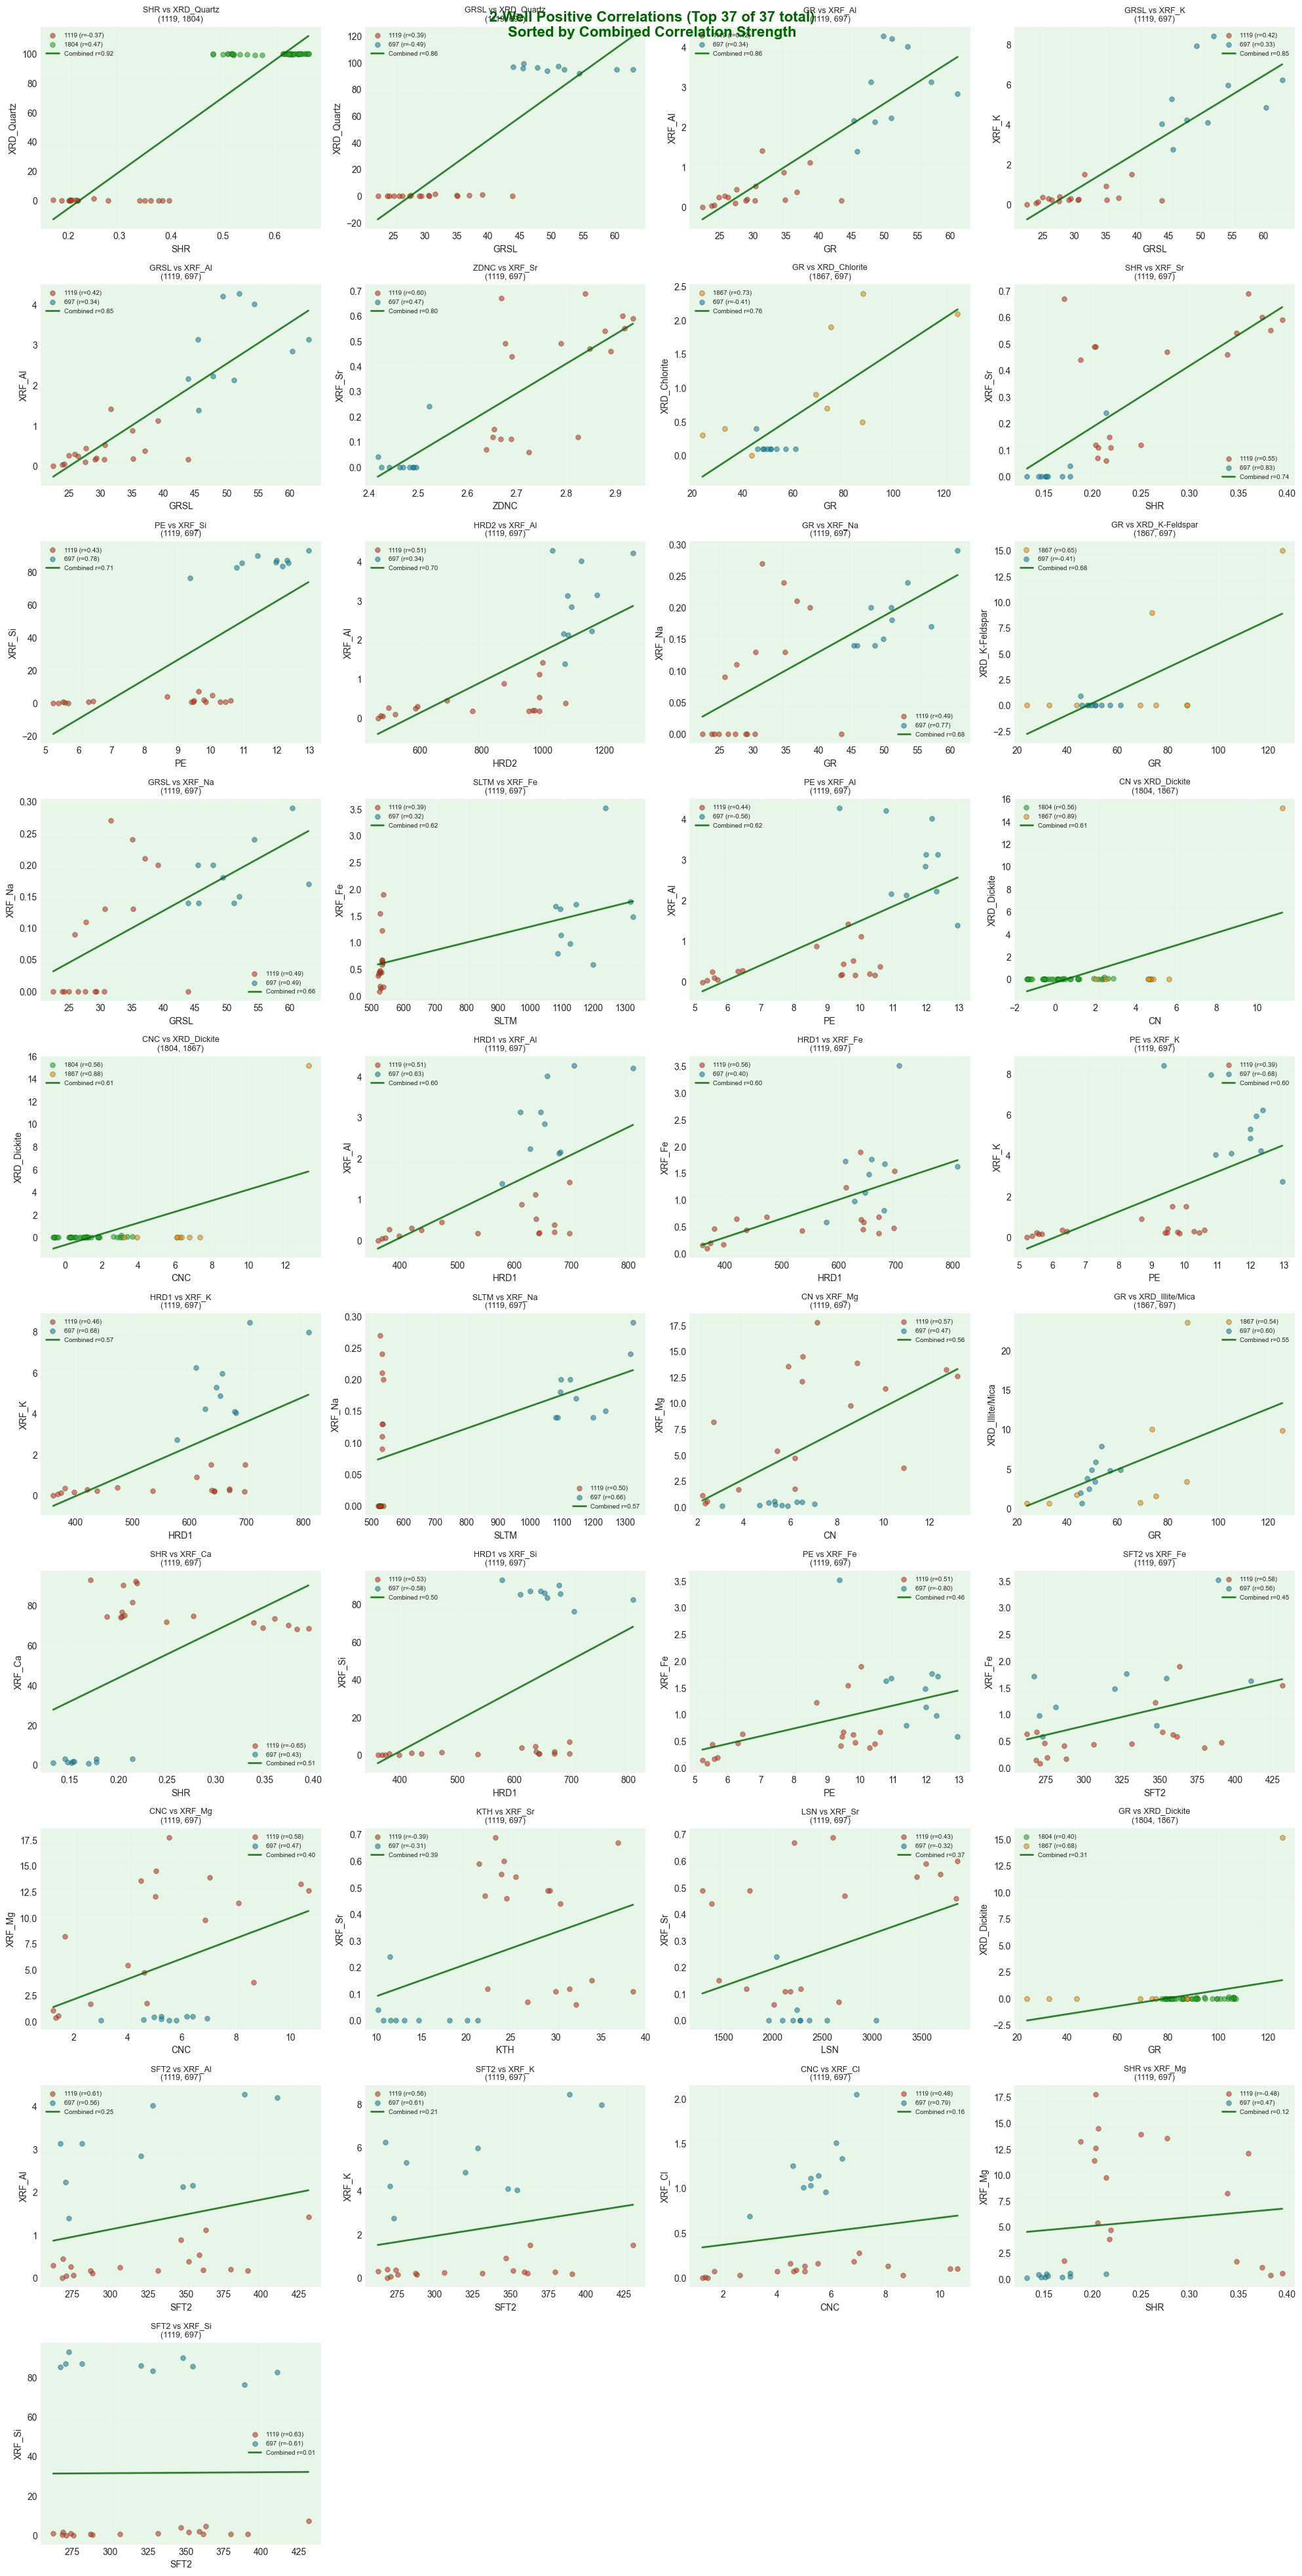


Creating scatter plots for 3-well correlations...


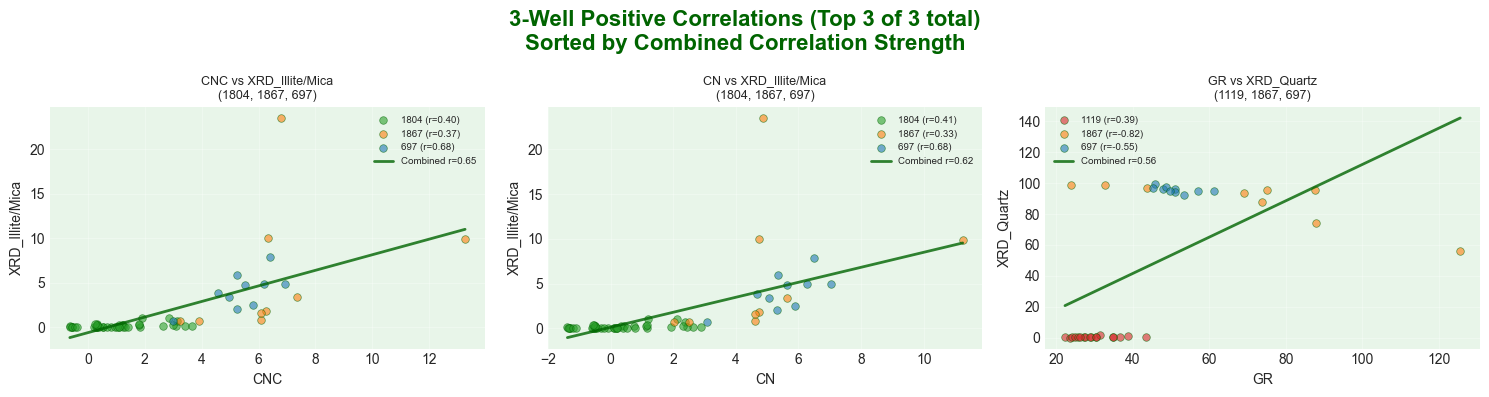


Creating scatter plots for 4-well correlations...


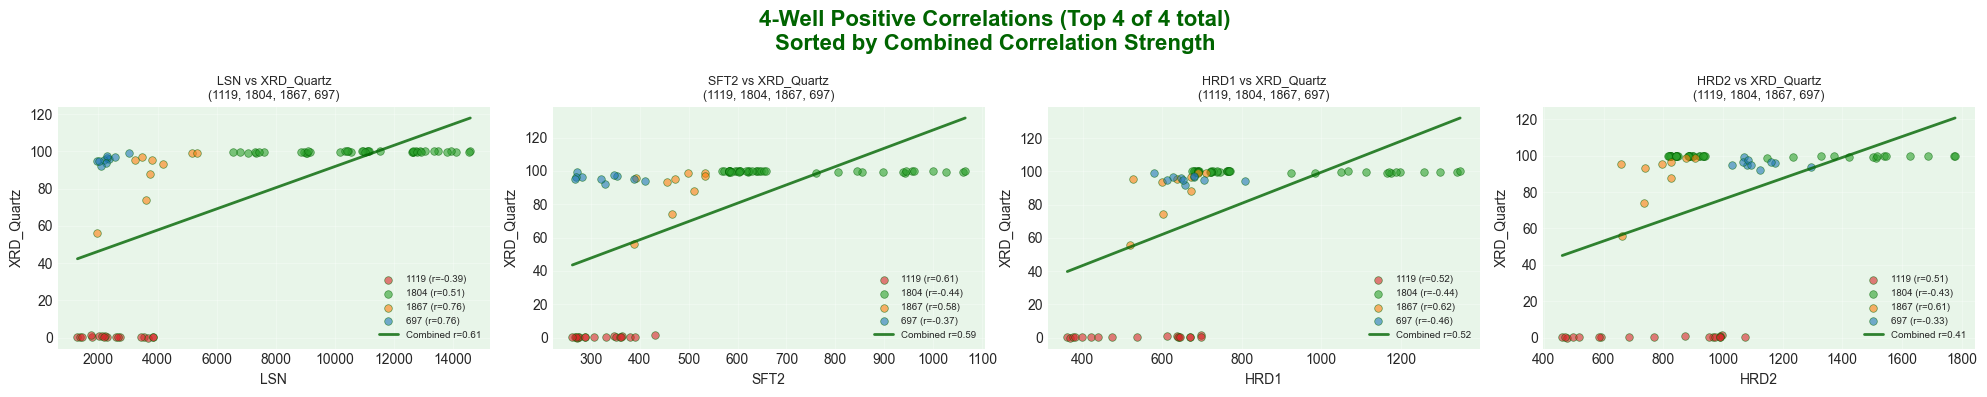

In [5]:
# Organize correlations by well count
correlations_by_well_count = {2: [], 3: [], 4: []}

# Process common_correlations to populate the dictionary
for _, row in common_correlations.iterrows():
    n_wells = row['num_wells']
    
    if n_wells in correlations_by_well_count:
        log_var = row['log_var']
        lab_var = row['lab_var']
        
        # Only include if it's in your specific logs (if you want to filter)
        if specific_logs and log_var.replace('Log_', '') not in specific_logs:
            continue
            
        # Extract individual well correlations
        wells_data = []
        for well in row['wells_found_in']:
            # Find the correlation value for this well
            well_r_col = f"{well}_r" if f"{well}_r" in row else None
            
            if well_r_col and pd.notna(row[well_r_col]):
                wells_data.append((well, row[well_r_col]))
            else:
                # If the correlation value is stored in r_values dict
                if 'r_values' in row and isinstance(row['r_values'], dict):
                    if well in row['r_values']:
                        wells_data.append((well, row['r_values'][well]))
        
        # Only add if we have data for all expected wells
        if len(wells_data) == n_wells:
            # Create info dictionary
            info = {
                'avg_corr': row['avg_r'],
                'avg_abs_corr': row['avg_abs_r'],
                'std_corr': row['std_r'],
                'n_wells': n_wells,
                'correlation_type': 'Positive' if row['avg_r'] > 0 else 'Negative',
                'consistent_direction': row['consistent_direction'],
                'missing_wells': [w for w in df_all['Well'].unique() if w not in row['wells_found_in']]
            }
            
            correlations_by_well_count[n_wells].append(((log_var, lab_var), wells_data, info))

# Sort correlations by absolute value before plotting
for n_wells in correlations_by_well_count:
    correlations_by_well_count[n_wells].sort(key=lambda x: x[2]['avg_abs_corr'], reverse=True)

# Print summary of what was loaded
for n_wells, corrs in correlations_by_well_count.items():
    print(f"\n{n_wells}-well correlations: {len(corrs)} pairs")
    if corrs:
        # Show top 5 instead of just 3
        print(f"Top {min(5, len(corrs))} correlations:")
        for i, ((log_var, lab_var), wells_data, info) in enumerate(corrs[:5]):
            wells_str = ', '.join([w.replace('HRDH_', '') for w, _ in wells_data])
            print(f"  {i+1}. {log_var.replace('Log_', '')} vs {lab_var.replace('Lab_', '')}: wells {wells_str}, avg_r={info['avg_corr']:.3f}")

# Now call the scatter plot function
create_comprehensive_correlation_scatter_plots_from_existing(
    df_all, 
    correlations_by_well_count,
    min_corr,
    min_samples_per_well=8,
    max_plots_per_figure=100  # Reduced to show top correlations clearly
)

In [6]:
# Debug: Check the structure of common_correlations
print("\nColumns in common_correlations:")
print(common_correlations.columns.tolist())

# Check if r_values is stored as string and needs parsing
if 'r_values' in common_correlations.columns:
    sample_r_values = common_correlations['r_values'].iloc[0]
    print(f"\nType of r_values: {type(sample_r_values)}")
    print(f"Sample r_values: {sample_r_values}")
    
    # If it's a string representation of a dict, parse it
    if isinstance(sample_r_values, str):
        import ast
        # Parse string representation of dict
        for idx, row in common_correlations.iterrows():
            if isinstance(row['r_values'], str):
                common_correlations.at[idx, 'r_values'] = ast.literal_eval(row['r_values'])


Columns in common_correlations:
['log_var', 'lab_var', 'num_wells', 'wells_found_in', 'r_values', 'avg_r', 'avg_abs_r', 'std_r', 'consistent_direction']

Type of r_values: <class 'dict'>
Sample r_values: {'HRDH_1119': -0.39022815355298185, 'HRDH_1804': 0.5134330752201117, 'HRDH_1867': 0.7569765396199918, 'HRDH_697': 0.7573511224643611}


## pairplot with heatmap

In [7]:

# Use the new pairplot functions with the same variable groups you've defined
print("\nCreating enhanced multi-well pairplots...")
print("\nCreating organized pairplots by variable groups...")

# Define variable groups based on measurement type and expected relationships
variable_groups = {
    "Carbonate_Indicators": {
        "logs": ['Log_PE', 'Log_ZDNC', 'Log_CN', 'Log_CNC'],
        "labs": ['Lab_XRD_Calcite', 'Lab_XRD_Dolomite', 'Lab_XRF_Ca', 'Lab_XRF_Mg'],
        "description": "Carbonate minerals and related log responses"
    },
    
    "Clay_Indicators": {
        "logs": ['Log_GR', 'Log_K', 'Log_KTH'],
        "labs": ['Lab_XRD_Illite/Mica', 'Lab_XRD_Chlorite', 'Lab_XRF_K', 'Lab_XRF_Al'],
        "description": "Clay minerals and radioactive elements"
    },
    
    "Silicate_Minerals": {
        "logs": ['Log_GR', 'Log_PE', 'Log_ZDNC'],
        "labs": ['Lab_XRD_Quartz', 'Lab_XRF_Si', 'Lab_XRD_Anhydrite'],
        "description": "Silicate minerals and density responses"
    },
    
    "Spectral_Hardness": {
        "logs": ['Log_HRD1', 'Log_HRD2', 'Log_SFT2', 'Log_SHR'],
        "labs": ['Lab_XRF_Fe', 'Lab_XRF_Ca', 'Lab_XRD_Calcite'],
        "description": "Spectral hardness ratios and heavy elements"
    },
    
    "Top_Correlations": {
        "logs": [],  # Will be filled dynamically
        "labs": [],  # Will be filled dynamically
        "description": "Variables with strongest correlations"
    }
}

# Use the advanced pairplot functions
print("\nCreating advanced multi-well pairplots...")

# Create pairplots for each variable group
create_advanced_well_pairplots_by_group(df_all, variable_groups, min_samples_per_well=5)

# Or create a specific pairplot for variables of interest
carbonates_vars = ['Log_PE', 'Log_ZDNC', 'Lab_XRD_Calcite', 'Lab_XRF_Ca']
fig = create_advanced_well_pairplot(
    df_all,
    carbonates_vars,
    min_samples_per_well=5,
    filename="advanced_carbonates_analysis"
)
plt.close(fig)  # Free memory after viewing

print("Advanced multi-well pairplots completed!")


Creating enhanced multi-well pairplots...

Creating organized pairplots by variable groups...

Creating advanced multi-well pairplots...

Creating advanced multi-well pairplots by variable group...

Processing group: Carbonate_Indicators
  Creating pairplot with 8 variables: PE, ZDNC, CN, CNC, XRD_Calcite, XRD_Dolomite, XRF_Ca, XRF_Mg

Processing group: Clay_Indicators
  Creating pairplot with 7 variables: GR, K, KTH, XRD_Illite/Mica, XRD_Chlorite, XRF_K, XRF_Al

Processing group: Silicate_Minerals
  Creating pairplot with 6 variables: GR, PE, ZDNC, XRD_Quartz, XRF_Si, XRD_Anhydrite

Processing group: Spectral_Hardness
  Creating pairplot with 7 variables: HRD1, HRD2, SFT2, SHR, XRF_Fe, XRF_Ca, XRD_Calcite

Processing group: Top_Correlations
  Skipping Top_Correlations: No variables defined
Advanced multi-well pairplots completed!


# Summary Statistics and Export


In [8]:
# Create summary report
print("=" * 80)
print("COMBINED WELL ANALYSIS SUMMARY")
print("=" * 80)
print(f"\nDataset Overview:")
print(f"Total samples: {len(df_all):,}")
print(f"Number of wells: {df_all['Well'].nunique()}")
print(f"Lab variables: {len(lab_columns)}")
print(f"Log variables: {len(log_columns)}")

print(f"\nData Quality:")
overall_completeness = (1 - df_all.isnull().sum().sum() / (len(df_all) * len(df_all.columns))) * 100
print(f"Overall completeness: {overall_completeness:.1f}%")

# Calculate high missing columns
missing_pct = df_all.isnull().sum() / len(df_all) * 100
high_missing = missing_pct[missing_pct > 50]
print(f"Columns with >50% missing: {len(high_missing)}")

print(f"\nCorrelation Analysis:")
print(f"Variable pairs with |r| ≥ {min_correlation} in ≥2 wells: {len(common_correlations)}")


# Create comprehensive summary table
print("\nCreating comprehensive summary table...")
summary_data = []

for n_wells in [4, 3, 2]:
    if n_wells in correlations_by_well_count:
        correlations = correlations_by_well_count[n_wells]
        for pair, wells_data, info in correlations:
            log_var, lab_var = pair
            
            row = {
                'N_Wells': n_wells,
                'Log_Variable': log_var,
                'Lab_Variable': lab_var,
                'Avg_Correlation': info['avg_corr'],
                'Avg_Abs_Correlation': info['avg_abs_corr'],
                'Std_Correlation': info['std_corr'],
                'Correlation_Type': info['correlation_type'],
                'Consistent_Direction': info['consistent_direction']
            }
            
            # Add individual well correlations
            for well, r in wells_data:
                row[f'{well}_r'] = r
            
            # Add missing wells
            for well in info['missing_wells']:
                row[f'{well}_r'] = np.nan
                
            summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

if not summary_df.empty:
    # Reorder columns
    base_cols = ['N_Wells', 'Log_Variable', 'Lab_Variable', 'Avg_Correlation', 
                 'Avg_Abs_Correlation', 'Std_Correlation', 'Correlation_Type', 'Consistent_Direction']
    well_cols = sorted([col for col in summary_df.columns if col.endswith('_r')])
    summary_df = summary_df[base_cols + well_cols]
    
    # Sort by N_Wells and Avg_Abs_Correlation
    summary_df = summary_df.sort_values(['N_Wells', 'Avg_Abs_Correlation'], ascending=[False, False])
    
    print(f" Summary table created with {len(summary_df)} correlation pairs")
else:
    print(" No correlation data found for summary table")

COMBINED WELL ANALYSIS SUMMARY

Dataset Overview:
Total samples: 78
Number of wells: 4
Lab variables: 35
Log variables: 47

Data Quality:
Overall completeness: 69.0%
Columns with >50% missing: 33

Correlation Analysis:


NameError: name 'min_correlation' is not defined

In [ ]:
# Export results
print("Exporting results...")

# Save comprehensive summary table
if not summary_df.empty:
    summary_df.to_csv('imgs/correlation_summary_by_wells.csv', index=False)
    print(" Comprehensive summary saved to: imgs/correlation_summary_by_wells.csv")

# Save common correlations in simple format
common_corr_records = []
for item in common_correlations:
    if len(item) == 3:
        pair, wells_data, info = item
    else:
        pair, wells_data = item
        info = {}
    
    log_var, lab_var = pair
    for well, r in wells_data:
        common_corr_records.append({
            'Log_Variable': log_var,
            'Lab_Variable': lab_var,
            'Well': well,
            'Correlation': r,
            'N_Wells': info.get('n_wells', len(wells_data)),
            'Avg_Abs_Corr': info.get('avg_abs_corr', np.nan)
        })

if common_corr_records:
    common_corr_df = pd.DataFrame(common_corr_records)
    common_corr_df.to_csv('imgs/common_correlations_all_wells.csv', index=False)
    print("Common correlations saved to: imgs/common_correlations_all_wells.csv")


